In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

TensorFlow: 2.20.0-rc0
GPU Available: []


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0


In [3]:
TARGET_SIZE = (96, 96)

x_train_resized = tf.image.resize(x_train, TARGET_SIZE)
x_test_resized  = tf.image.resize(x_test, TARGET_SIZE)

print("Train set shape:", x_train_resized.shape)
print("Test set shape:", x_test_resized.shape)

Train set shape: (50000, 96, 96, 3)
Test set shape: (10000, 96, 96, 3)


In [4]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96 (Functional)     │ (None, 3, 3, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,588,490 (9.87 MB)

 Trainable params: 330,506 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
history = model.fit(
    x_train_resized, y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.2
)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.6380 - loss: 1.0593 - val_accuracy: 0.7634 - val_loss: 0.6848
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 75s 30ms/step - accuracy: 0.7430 - loss: 0.7450 - val_accuracy: 0.7829 - val_loss: 0.6177
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 75s 30ms/step - accuracy: 0.7716 - loss: 0.6600 - val_accuracy: 0.7955 - val_loss: 0.5893
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.7885 - loss: 0.6096 - val_accuracy: 0.7985 - val_loss: 0.5758
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.8010 - loss: 0.5784 - val_accuracy: 0.8078 - val_loss: 0.5549
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 76s 30ms/step - accuracy: 0.8115 - loss: 0.5459 - val_accuracy: 0.8105 - val_loss: 0.5453
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 76s 30ms/step - accuracy: 0.8181 - loss: 0.5168 - val_accuracy: 0.8145 - val_loss: 0.5340
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.8273 -

In [6]:
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8186 - loss: 0.5295
Test Loss: 0.5295
Test Accuracy: 81.86%


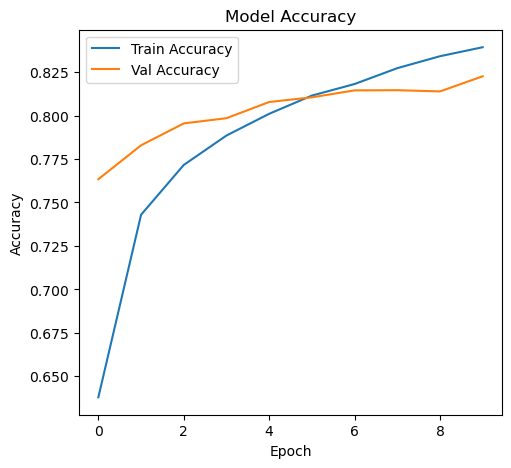

In [7]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

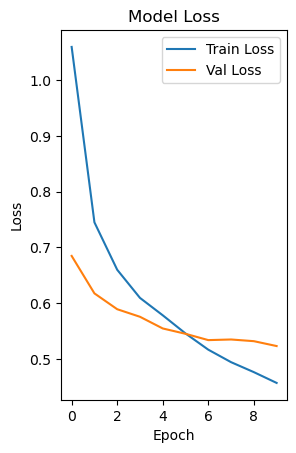

In [8]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


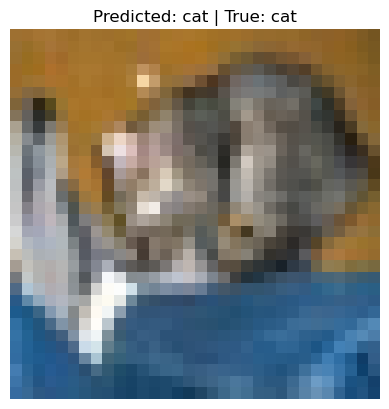

In [10]:
idx = 0
sample = tf.expand_dims(x_test_resized[idx], axis=0)
prediction = model.predict(sample)
predicted_class = class_names[np.argmax(prediction)]
true_class = class_names[y_test[idx][0]]

plt.imshow(x_test[idx])
plt.title(f"Predicted: {predicted_class} | True: {true_class}")
plt.axis('off')
plt.show()